In [34]:
import torch

import processing

import get_data

import matplotlib.pyplot as plt

import numpy as np

## Pipeline end-to-end

In [4]:
# read in the data

data_folder   = "Data/Set1/"

LF            = get_data.read_lightfield(data_folder)

param_dict    = get_data.read_parameters(data_folder)

depth_map     = get_data.read_depth(data_folder, highres=False)
depth_all_map = get_data.read_all_depths(data_folder, highres=False)

In [21]:
# convert the data to torch tensors

images     = torch.from_numpy(LF).permute([0,1,4,2,3]).float()/255.
depth_maps = torch.from_numpy(depth_all_map)

print(images.shape)
print(depth_maps.shape)


torch.Size([9, 9, 3, 512, 512])
torch.Size([9, 9, 512, 512])


In [22]:
# create the depth tensors
layers = 16

depth_tensors = torch.zeros((9,9,512,512,layers))

for i in range(9):
    for j in range(9):
        depth_tensors[i,j] = processing.create_depth_tensor(depth_maps[i,j], layers)
        
print(depth_tensors.shape)

torch.Size([9, 9, 512, 512, 16])


In [23]:
# convert the 0-1 depth tensor to smoothed alpha depth tensors

alpha_tensors = torch.zeros((9,9,512,512,layers))

for i in range(9):
    for j in range(9):
        alpha_tensors[i,j] = processing.naive_alpha(depth_tensors[i,j])
        
print(alpha_tensors.shape)

torch.Size([9, 9, 512, 512, 16])


In [25]:
# convert alpha tensors and rgb images to rgba depth tensors

rgba = torch.zeros((9,9,4,512,512,layers))

for i in range(9):
    for j in range(9):
        rgba[i,j] = processing.rgba(images[i,j], alpha_tensors[i,j])
        
print(rgba.shape)

torch.Size([9, 9, 4, 512, 512, 16])


In [26]:
#  HOMOGRAPHY WARP

In [29]:
# alpha compositve rgba images from the rgba depth tensors

C_alpha = torch.zeros((9,9,4,512,512))

for i in range(9):
    for j in range(9):
        C_alpha[i,j] = processing.back_to_front_alphacomposite(rgba[i,j])
        
print(C_alpha.shape)

torch.Size([9, 9, 4, 512, 512])


In [30]:
# seperate RGB images and alpha images

RGB    = C_alpha[:,:,:3,:,:]
alpha  = C_alpha[:,:, 3,:,:]

print(RGB.shape)
print(alpha.shape)

torch.Size([9, 9, 3, 512, 512])
torch.Size([9, 9, 512, 512])


In [ ]:
# Equation (8)

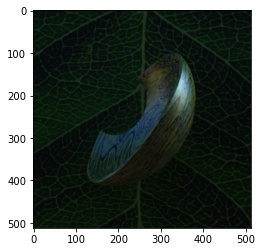

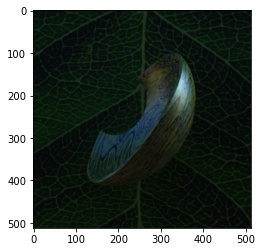

In [37]:
# plot test  (so far no homography warping, no rendering)
original_img  = images[0,0].permute(1,2,0).numpy()
reproduce_img = RGB[0,0].permute(1,2,0).numpy()

plt.imshow(original_img)
plt.show()
plt.imshow(reproduce_img)
plt.show()